# Olympics Datathon - A Data Story-Telling Competition

## Warning
**Shared links will not contain your edits or outputs. To include your edits, select File→Save a copy in Drive and generate a link from the resulting copy.**

## Welcome to the Datathon

The Olympics Datathon is designed to be an entry level, language-agnostic mini "hackathon". The focus of the datathon will be the explorative data analysis - or as we like to call it data storytelling - of the given Olympics dataset

### Event Timeline

| Date         | Time  | Event                                                 |
|--------------|-------|-------------------------------------------------------|
| 16th October | 3-4pm | Dataset introduction & Python basics for storytelling |
| 16th October | 4-5pm | R workshop by Warwick Statistics Society              |
| 16th October | 5-6pm | In person guidance                                    |
| 16th October | 6pm   | Free pizza                                            |
| 23rd October | 6pm   | Submission deadline                                   |

## Python teaching session
  

**Contents**

1. Explanation of Approach
2. TO-DO
3. Preliminaries; unique values and number of values

4. Missing values analysis; 

Barplot of missing values for each attribute

Heatmap of correlations between X being missing and Y being missing

Dendrogram of attributes based on conincident missing values

5. Conditional probabilities of medal outcomes conditioning on gender

6. Histograms of Age, Height, Weight

Histogram of Age

Histogram of Height

Histogram of Weight

7. Conditional probabilities of medal outcomes conditioning on age quartile

Probabilities for Age less than 21



**Explanation of Approach**

Dulnath;
The way we're approaching this is to model this with a Naive Bayes classifier.

https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Probabilistic_model



To make it work with the continuous variables (which aren't discrete categories) we use the method suggested in the StackExchange post below; for continuous variables, split into quartiles and use which quartile each datapoint falls into as a discrete feature. Note; We can't just bin by age (into say 1 year bins) because then there'd be different numbers of people in each age category and the feature is probably going to depened on the age distribution etc in the general population.

https://stats.stackexchange.com/questions/218492/how-does-naive-bayes-work-with-continuous-variables



So our approach is to calculate things like;

Probability of getting gold, given that the athlete is male,

Probability of getting gold, given that the athlete is at least (inclusive) 21 years old but less than 24

etc


These also give us insight into how each feature we're conditioning on affects the athlete's outcome; For example, we know how the medal (gold, silver,bronze, no medal) distribution is for men versus women.



So our exploratory data analysis (which isn't predictive by itself), is partly guided by the idea of using a Naive Bayes model to predict athlete outcomes.

However, we also carry out EDA that's unrelated to the Naive Bayes model for any other insights it can provide.

--------------------------------------------

Roadmap of the Notebook
-----------------------------

The To-Do section that was in use during work on this is below.

After that, pandas and numpy are imported and the dataset csv is acquired and assigned.


We begin by inspecting the first section of the dataset, the columns and their data types, and basic descriptive aspects of each column (unique values, number of values in each column etc).


We carry out an extended analysis of missing values:


///////////////////


We begin the analysis of missing values by discussing the handling of missing values for specific attributes in the dataset, and importing a package for analysing missing values(missingno)


We then check the number of missing values for each attribute or column, visualize this (or equivalently the data completeness of each attribute) on a bar chart.


We visualize how attributes' missing values coincide (ie; how a entry value for a given variable being missing correlates with the value of another attribute value for the same entry being missing)
with a heatmap.


Then we plot a dendrogram of the attributes based on coinciding missing values. We interpret the missing values visualizations, make informed guesses as to the underlying procceses that give us the observed patterns in missing values, and briefly note the implications for a Naive Bayes model based on the dataset.


/////////////////////////



We then calculate conditional probabilities of achieving particular medal outcomes, conditioning on gender, and discuss the implications for non-exploratory analysis or use of the dataset. Note that the calculation of conditional probabilities was done for the purpose of building a Naive Bayes model of athlete outcomes (the work for this is only partially done)


We then calculate quantiles of the age distribution of athletes (partly because it was neccesary for incorportaing age into the Naive Bayes model), interpret the results and discuss potential implications for some substantive topics of analysis (eg; cross-country comparison).


Next we  plot histograms of athlete Height, Weight, and Age, and interpret them to note what they suggest about the underlying distributions for those variables. We also briefly note that this may have implications for regression analysis or hypothesis testing.


We then return to calculating the conditional probabilties required for Naive Bayes; in this section we handle age. We follow a common method of applying Naive Bayes to continuous variables in converting it to four bins of quartiles ( discretising age into four equally-frequent age classes). We then begin calculating the conditional probabilities of each medal outcome  given age class, starting with the under-21s quartile.


-----------------------------------------------















**TO-DO**

Analysing individual variables;

- What's the age distribution of Olympic athletes ? (similarly for mass, height). Use histograms/barcharts?

- Which, if any, of these parameters have "nice" distributions; how well does the athlete age distribution match a normal distribution?

- Are there differences between countries in how may athletes they send to the Olympics; Note; apparently this does differ:

https://www.statista.com/statistics/1253109/tokyo-summer-olympics-europe-countries-most-athletes/

- What's the overall gender split?

- Which events draw the most participants AND which events draw the most participants relative to eg; typical team size.


https://stats.stackexchange.com/questions/352688/is-exploratory-data-analysis-important-when-doing-purely-predictive-modeling

Note; so there's still a lot of EDA that's unconnected to anything predictive... I still think the Naive Bayes model approach is a good lens, especially for seeing which features predict performance, but we might need to do some of the other stuff as well.

- What are the outliers for each feature?

- Correlations between each feature?

- The previously mentioned mass, height, age etc histograms// Mass, height, age histograms done.


In [ ]:
# Library imports for data handling
import pandas as pd
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/warwickdatasciencesociety/olympic-datathon/main/dataset/athlete_events.csv

--2021-10-21 13:37:15--  https://raw.githubusercontent.com/warwickdatasciencesociety/olympic-datathon/main/dataset/athlete_events.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41229571 (39M) [text/plain]
Saving to: ‘athlete_events.csv’

athlete_events.csv  100%[===================>]  39.32M   167MB/s    in 0.2s    

2021-10-21 13:37:17 (167 MB/s) - ‘athlete_events.csv’ saved [41229571/41229571]



In [ ]:
data = pd.read_csv("athlete_events.csv")

In [ ]:
data.head

<bound method NDFrame.head of             ID  ... Medal
0            1  ...   NaN
1            2  ...   NaN
2            3  ...   NaN
3            4  ...  Gold
4            5  ...   NaN
...        ...  ...   ...
271111  135569  ...   NaN
271112  135570  ...   NaN
271113  135570  ...   NaN
271114  135571  ...   NaN
271115  135571  ...   NaN

[271116 rows x 15 columns]>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
data.describe(include="O")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


Dulnath; We note the unique values row in particular, together with the truncated portions of the dataset below, and the non-null counts.

We also analyse the number of missing values specifically below

By observation of the non-null counts, we see that Age, Height, and Weight values are missing for some of the entries ( missing for 9474 entries , 60171 entries and 62,875 entries respectively)

As a percentages of the total number of datapoints, this is 3.49%, 22.19%, and 23.19% respectively of the datapoints.

https://datascience.stackexchange.com/questions/12797/scikit-learn-missing-data-categorical-values

These datapoints with missing values may need to be removed; this is feasible for the datapoints with missing Age values since those are a relatively small fraction of the dataset. However, it is less feasible for Height and Weight, since around 1/5 th of the dataset would have to be removed.

That risks distorting the data if these values being missing correlates with any of our features; older Games may have had poorer data collection. Also, recording of Height and Weight may have been disproportionately lacking for events that are not explicitly dependent on height or weight classes. This has implications for analysing correlations between these physical attributes and performance. Events with height or weight classes should be less influenced by athletes heights and weights since they explicitly section off competition into classes of athletes competing only agaisnt other with similar heights or weights. But for events without these classes, each athlete's potential competitors have a much larger range of heights and weights and they thus may be significant factors in athletes' relative performance.

https://datascience.stackexchange.com/questions/98144/what-is-the-better-approach-to-handle-missing-values

Further exploratory analysis is required to decide how to handle Height and Weight.

NOTE; This package might be useful for visualizing the datapoints with missing values.
https://pypi.org/project/missingno/

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

The heatmap and dendrogram features seem especially useful. They can identify which values, if missing, go missing together ( ie; if the value for X is missing then Y and Z also tend to be missing )





In [ ]:
import missingno as msno

#we import the missingno package for analysing missing values, as msno.



In [ ]:
data.isna().sum()
# Checks how many missing values are in the dataframe.

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

We confirm what we discovered about the number of missing values from earlier.

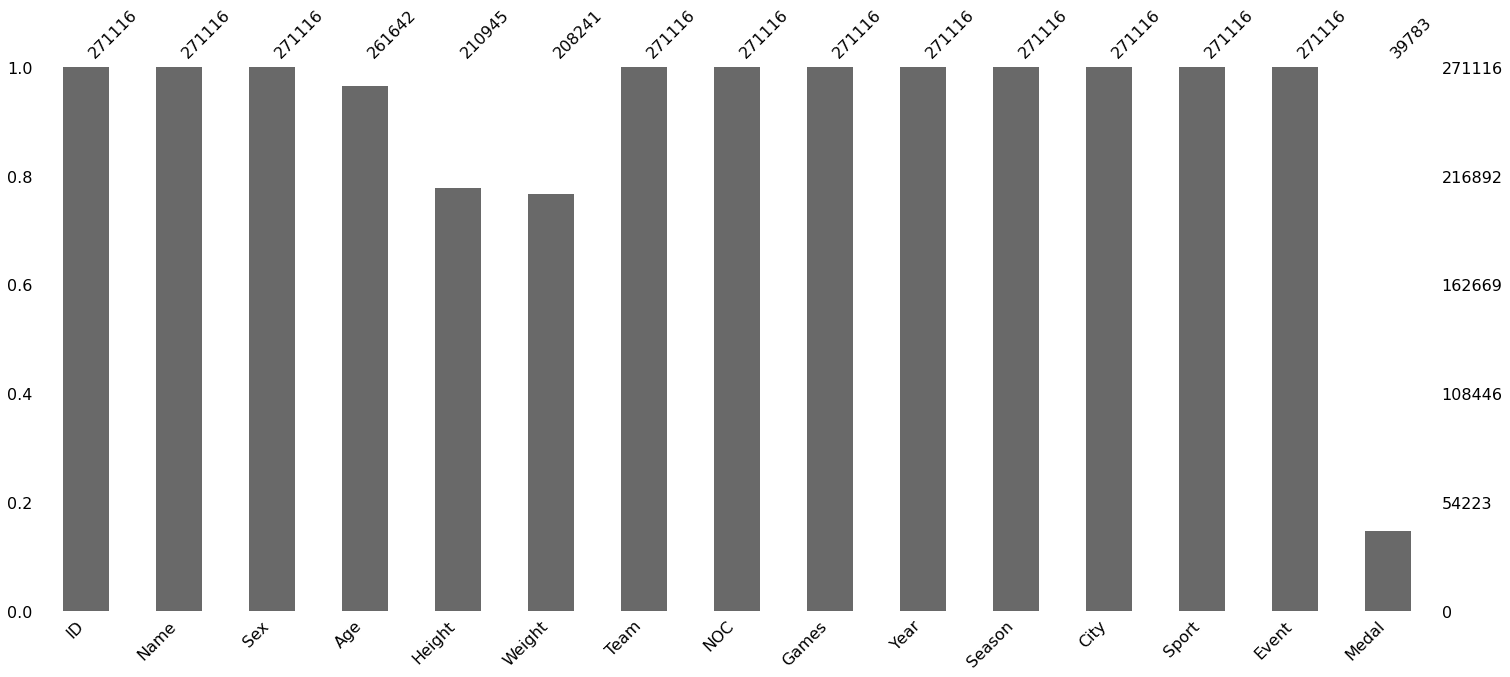

In [ ]:
msno.bar(data)

We now have a visualisation of the proportion of missing values for each attribute.

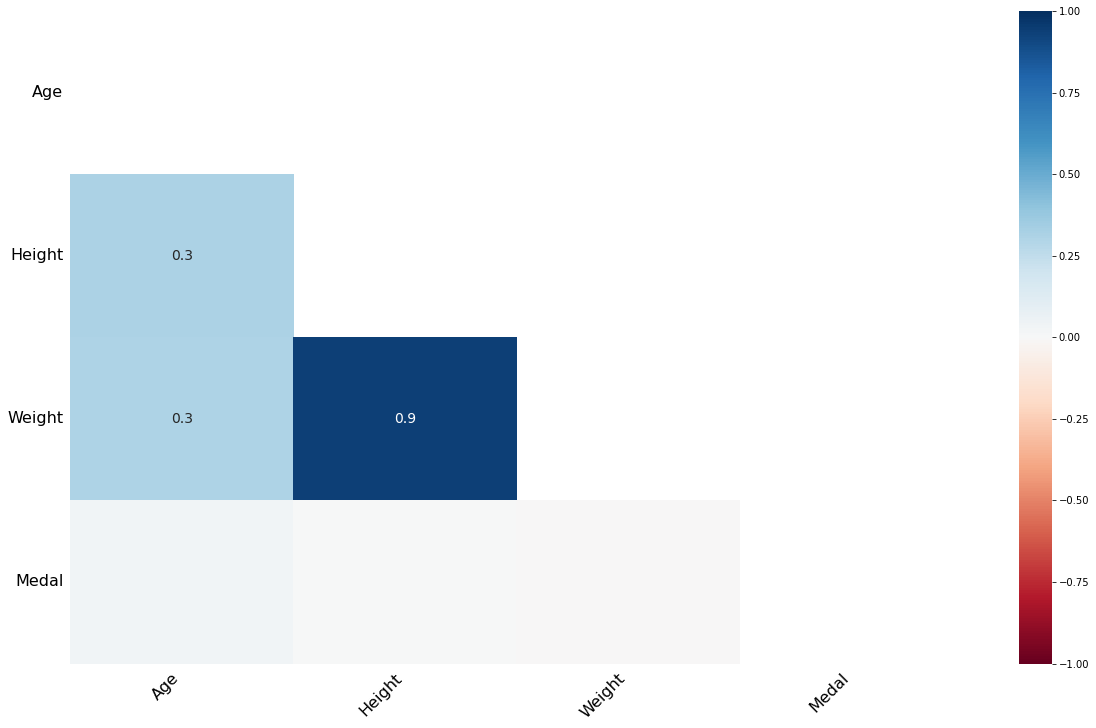

In [ ]:
msno.heatmap(data)
# This generates a heatmap show which values tend to go missing when other go missing. The numbers in each square are the correlation
# coefficients for the values being missing (+1 means they go missing together for the same entries, -1 means they go missing for 
# entirely different entries)

So we now see that Height and Weight each go missing in mild correlation with Age.

More importantly, note the strong positive correlation between height being missing and weight being missing.

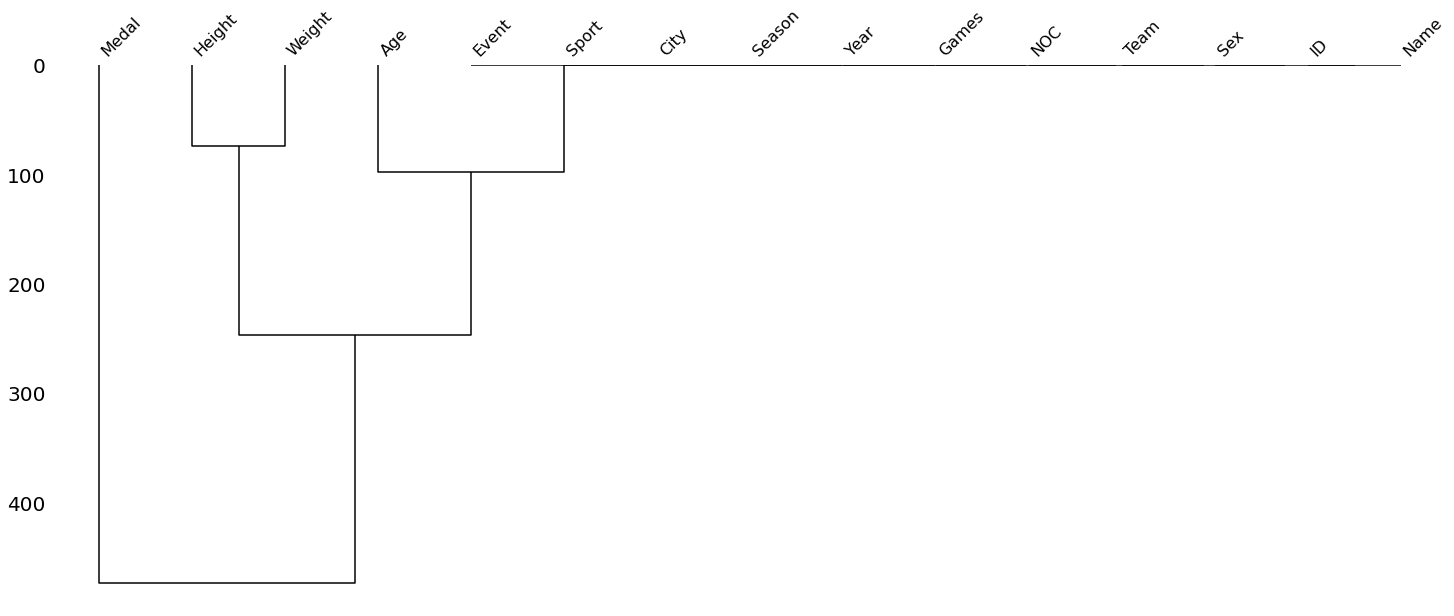

In [ ]:
msno.dendrogram(data)
# This generates a tree-like graph succesively splitting the features into subgroups, where each subgroup is a set of
# attributes whose values go missing together.

Here the Medals attribute first splits off from the rest because every athlete who didn't win Gold, Silver or Bronze is essentially not assigned a value for Medal; irrespective of other variable, they just get NA in the medal column.

Then the other variables split into two subgroups; Height, Weight, and Age, Sport. This further supports the idea that Height and Weight are missing together for a specific reason (especially since they've branched off from Age, which is the other attribute with a significant number of missing values).

The Event, Sport etc values in the rightmost cluster have no missing values. The fact that Age is in this branch suggests that ( noting the the fact that the correlation for it being missing together with Hieght or Weight was low; in the heatmap) it's not going missing due to the same systematic reasons as Height or Weight. 

This suppports the idea that Age values may be going missing at random (it's not grouped with the attributes for which we suspect there's a systematic reason for going missing) , and has implications for how we deal with the mssing values

**TO DO**; Check for correlations between whether or not a attribute has gone missing with the values of the other attributes.

Note; Naive Bayes is relatively reliable in the presence of missing values, since it can just ignore the attribute for that instance,

https://datascience.stackexchange.com/questions/97157/really-confused-with-characteristics-of-naive-bayes-classifiers


In [ ]:
data[data["Medal"] != ""]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
data[data['Sex'] == 'M']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
data[data['Sex'] == 'F']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [ ]:
data[data['Age'] < 21]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
59,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Downhill,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271052,135547,Viktoriya Viktorovna Zyabkina,F,19.0,174.0,62.0,Kazakhstan,KAZ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 200 metres,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
271087,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN
271088,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN


Here we the conditional probabilties of each medal outcome conditioning on gender. (But we also note the gender gap in the number of athletes). We also note that there is a substantial number of medal winners of each gender. 

Especially consider that the number of medal X winner of one specific gender is greater than 3000 (which we can see by inspection). This is important because means that we can have reasonably sized subsamples holding gender and medal won constant, over which we can reliably conduct some kinds of statistical analysis (but not others, depending on the sample size requirements for accuracy). 

Total = 271,116

Male total = 196,594


Male Medals = 28,530

Male Non-Medals = 168,064

Gold Conditional Probability = 0.04895876782

Bronze Conditional Probability = 0.04844501867

Silver Conditional Probability = 0.04771763126

No Medals Conditional Probability = 0.8548785823

---------------------

Female total = 74,522

Female medal = 11,253

Female Non-medal = 63,269

Bronze Conditional Probability = 0.05060250664

Gold Conditional Probability = 0.05028045409

Silver Conditional Probability = 0.05011942782

No medals conditional probability = 0.8489976114



In [ ]:
data.groupby('Sex')['Medal'].value_counts()

Sex  Medal 
F    Bronze    3771
     Gold      3747
     Silver    3735
M    Gold      9625
     Bronze    9524
     Silver    9381
Name: Medal, dtype: int64

Dulnath;

From the conditional probabilities and counts, we see that in about 85% of the instances of an athlete participating in a given event, they do not win a medal for it. (That is to say, a given athlete participating in a given event has an 85% chance of not winning a medal for it; it is important to keep in mind this is over all the recorded instances of participation, across all years and Games (ignoring potential missing records or errors etc) ).

**[I hope this interpretation is fine]**


This has implications for the use of this dataset for non-exploratory analysis; for example, analysis using medals won has to keep in mind that gold, silver and bronze medals discriminate between only about 15% of these instances, and whether or not a medal was won divides the dataset in a 3:17 ratio. This is relevant because it tells us how informative winning or not winning a medal is, and alerts us to how small  a subsample anything analysing relative rates of winning gold vs silver vs bronze relies on.

We also note the disparity between the overall conditional probabilities for each medal, and the probabilities once we condition on age being less than 21.

This suggests a correlation between age and the probability of winning a medal, which can be investigated further (which may eventually require accounting for it in models or explicitly controlling for it if analysing the impact of another variable on medal-winning )



In [ ]:
data.Age.quantile([0.025,0.25, 0.5, 0.75,0.975])

0.025    16.0
0.250    21.0
0.500    24.0
0.750    28.0
0.975    42.0
Name: Age, dtype: float64

Dulnath; Added new quantiles to check the "range" of ages. Changed df to data to get the line to work.

From the above, we see that 95% of the instances for athletes are of ages between 16 to 42 (note; counts each instance of participation, in each event etc seperately) These quantiles can inform later investigation into age-related aspects of the dataset/Olympic athletes.

The "range" of athlete ages is limited, and regresssion, extrapolation etc outside  this range may be less reliable. Due to most ages being between 16 and 42, different age effects on other variables may be swamped out if this isn't explicitly adjusted for.

This may also need to be taken into account if the data is used to for comparative analysis across countries (given the very different distributions of ages in the general populations of different countries). 

Note; Perhaps need to apply the 1.5 IQR rule to check what fraction of the dataset isn't an outlier.

https://stats.stackexchange.com/questions/237012/1-5-iqr-in-finding-outliers

Though, it'll probably have to be coupled with a histogram to check it isn't just giving lots of outliers because the ages etc have a skewed distribution.

In [ ]:
from matplotlib import pyplot as plt 
# Histogram of Age

NotMissingAge = data[data['Age'] != '' ]
# Ages without missing values
Age = NotMissingAge['Age']

##Below code doesn't work as intended
#Now the Histogram array
#HistArray = np.histogram(Age, bins= 'auto', range = (0,100))
#plt.hist(HistArray)
# Something's gone wrong; this doesn't plot a sensible-looking histogram


We check histograms for Age, Height and Weight. The bin counts for each are assigned by trial and error, and visual inspection. The automatic bin selection feature available in the packages couldn't be set up.

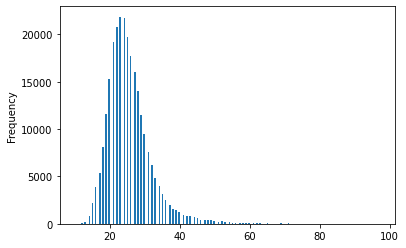

In [44]:
AgeNotMissing = data[data['Age'] != '']
# We get the list of ENTRIES, leaving out ones with missing ages
HistAge = AgeNotMissing['Age']
# We extract the Age column from that

#We plot the histogram
HistAge.plot.hist(bins = 200)


We note visually that the Age distribution has a slight right skew.

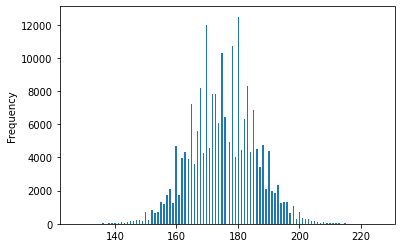

In [47]:
HeightNotMissing = data[data['Height'] != '']
# We get the list of ENTRIES, leaving out ones with missing heights
HistHeight = HeightNotMissing['Height']
# We extract the Age column from that

#We plot the histogram
HistHeight.plot.hist(bins = 200)

We note that the histogram is visually not exactly bell-shaped.(It seems leptokurtic) The Height distribution of Olympic athletes may not be normally distributed; this would need to be taken into account for any hypothesis tests or regression analyses.

https://stats.libretexts.org/Sandboxes/moja_at_taftcollege.edu/PSYC_2200%3A_Elementary_Statistics_for_Behavioral_and_Social_Science_(Oja)_WITHOUT_UNITS/02%3A_What_Do_Data_Look_Like_(Graphs)/2.07%3A_Skew_and_Kurtosis


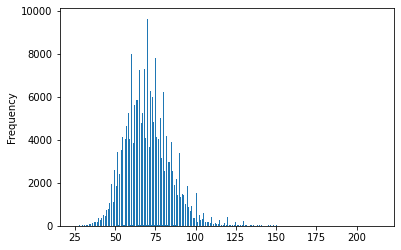

In [55]:
WeightNotMissing = data[data['Weight'] != '']
# We get the list of ENTRIES, leaving out ones with missing weights
HistWeight = WeightNotMissing['Weight']
# We extract the Weight column from that

#We plot the histogram
HistWeight.plot.hist(bins = 300)

 Again, we note the graph is not exactly bell-shaped. This too may be leptokurtic.

From this point, we calculate the conditional probabilities of getting Gold, Silver, Bronze or no medal given that the athlete is in a particular age quartile. We condition on age quartile since that appears to be a standard way of apply Naive Bayes for continuous vairables like age.

https://stats.stackexchange.com/questions/218492/how-does-naive-bayes-work-with-continuous-variables

https://datascience.stackexchange.com/questions/47027/how-does-naive-bayes-classifier-work-for-continuous-variables/47031#47031


**RESULTS**

From this point we begin checking medal outcome probabilities condtioning on which age quartile the athlete is in.
We have the results for the quartile up to 21 exclusive.

Less than 21:

Total = 47,561

Gold total = 1,837

gold conditional probability = 0.03862408276

silver total = 1,773

silver conditional probability = 0.03727844242

bronze total = 1,802

bronze conditional probability = 0.0378881857

no medal = 42,149

no medal conditional probability = 0.8862092891

In [ ]:
data[data['Age'] < 21][data['Medal'] == 'Gold']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
710,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
1080,608,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270432,135269,Zou Kai,M,20.0,158.0,55.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Floor Exercise,Gold
270433,135269,Zou Kai,M,20.0,158.0,55.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Horizontal Bar,Gold
270773,135415,Robertas ulpa,M,20.0,193.0,82.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Breaststroke,Gold
270896,135474,Albert Hermann Zrner,M,18.0,NaN,NaN,Germany,GER,1908 Summer,1908,Summer,London,Diving,Diving Men's Springboard,Gold


In [ ]:
data[data['Age'] < 21][data['Medal'] == 'Silver']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
106,38,Karl Jan Aas,M,20.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
677,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver
700,399,Egil Sten Abel,M,20.0,NaN,NaN,Fornebo,NOR,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 7 metres,Silver
728,416,Nils Georg berg,M,19.0,181.0,78.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Triple Jump,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269549,134873,Zhuang Yong,F,19.0,172.0,68.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Silver
269641,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,16.0,173.0,61.0,United States,USA,1992 Winter,1992,Winter,Albertville,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Silver
270613,135345,Viktor Alekseyevich Zubkov,M,19.0,202.0,88.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,Silver
270715,135384,"Giovanni Battista ""Gianni"" Zuddas",M,20.0,NaN,NaN,Italy,ITA,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Bantamweight,Silver


In [ ]:
data[data['Age'] < 21][data['Medal'] == 'Bronze']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
684,395,Jennifer Abel,F,20.0,160.0,62.0,Canada,CAN,2012 Summer,2012,Summer,London,Diving,Diving Women's Synchronized Springboard,Bronze
727,416,Nils Georg berg,M,19.0,181.0,78.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Long Jump,Bronze
740,424,Moira Abernethy (-Ford),F,17.0,NaN,NaN,South Africa,RSA,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
789,455,Denis Mikhaylovich Ablyazin,M,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270594,135335,Martina Zubi,F,19.0,173.0,55.0,Croatia,CRO,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Featherweight,Bronze
270743,135402,Mindaugas ukauskas,M,20.0,201.0,100.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze
270761,135409,Mauro Carlo Zuliani,M,20.0,175.0,62.0,Italy,ITA,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze
270960,135498,Denis vegelj,M,20.0,NaN,NaN,Slovenia,SLO,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxless Pairs,Bronze


In [ ]:
data[data['Age'] < 21][data['Medal'] != 'Gold'][data['Medal'] != 'Silver'][data['Medal'] != 'Bronze']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
59,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Downhill,NaN
62,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
87,26,Agnes Erika Aanonsen (-Eyde),F,17.0,169.0,65.0,Norway,NOR,1984 Winter,1984,Winter,Sarajevo,Luge,Luge Women's Singles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271052,135547,Viktoriya Viktorovna Zyabkina,F,19.0,174.0,62.0,Kazakhstan,KAZ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 200 metres,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
271087,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN


In [ ]:
data[  data['Age'] < 24][data['Medal'] == 'Gold']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
150,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team",Gold
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold
182,80,Jos Mara Abarca Plotas,M,22.0,186.0,83.0,Spain,ESP,1996 Summer,1996,Summer,Atlanta,Water Polo,Water Polo Men's Water Polo,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270773,135415,Robertas ulpa,M,20.0,193.0,82.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Breaststroke,Gold
270896,135474,Albert Hermann Zrner,M,18.0,NaN,NaN,Germany,GER,1908 Summer,1908,Summer,London,Diving,Diving Men's Springboard,Gold
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
